# Problem 3 - Weight Initialization, Dead Neurons, Leaky ReLU

## 3.1

In [21]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Run the data through a few MLP models and save the activations from each layer into a Pandas DataFrame
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    input_shape = (data_dim,)
    kernel_initializer = init
    bias_initializer = 'zeros'
    activation = 'sigmoid'


    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

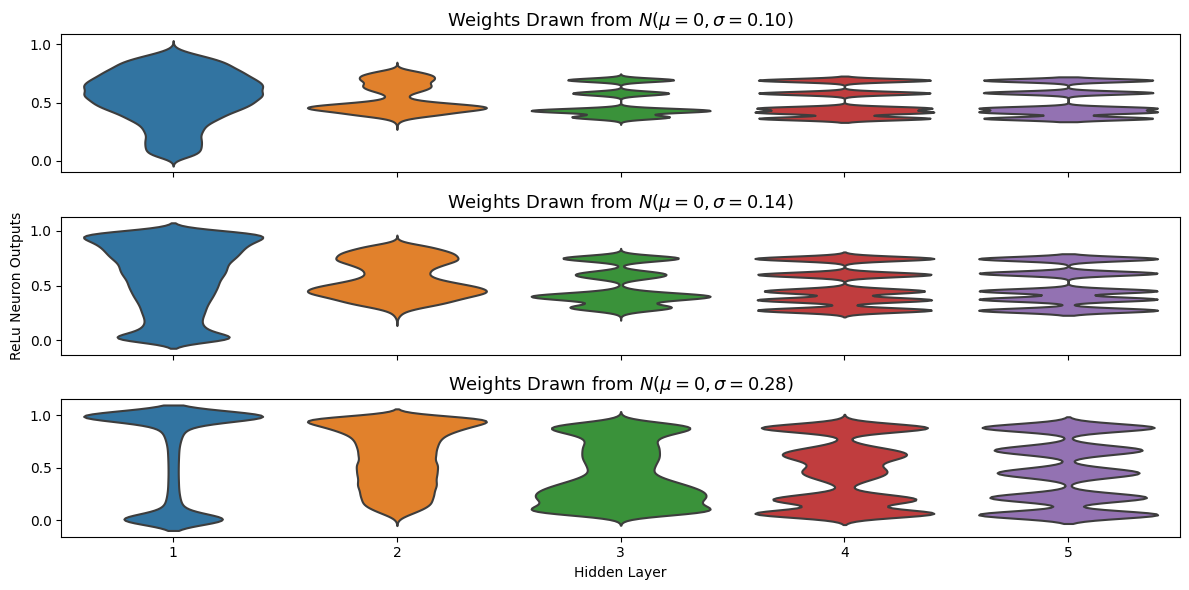

In [11]:
# Plot previously saved activations from the 5 hidden layers using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("ReLu Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

In [12]:
seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
# Run the data through a few MLP models and save the activations from each layer into a Pandas DataFrame
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    input_shape = (data_dim,)
    kernel_initializer = init
    bias_initializer = 'zeros'
    activation = 'tanh'


    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

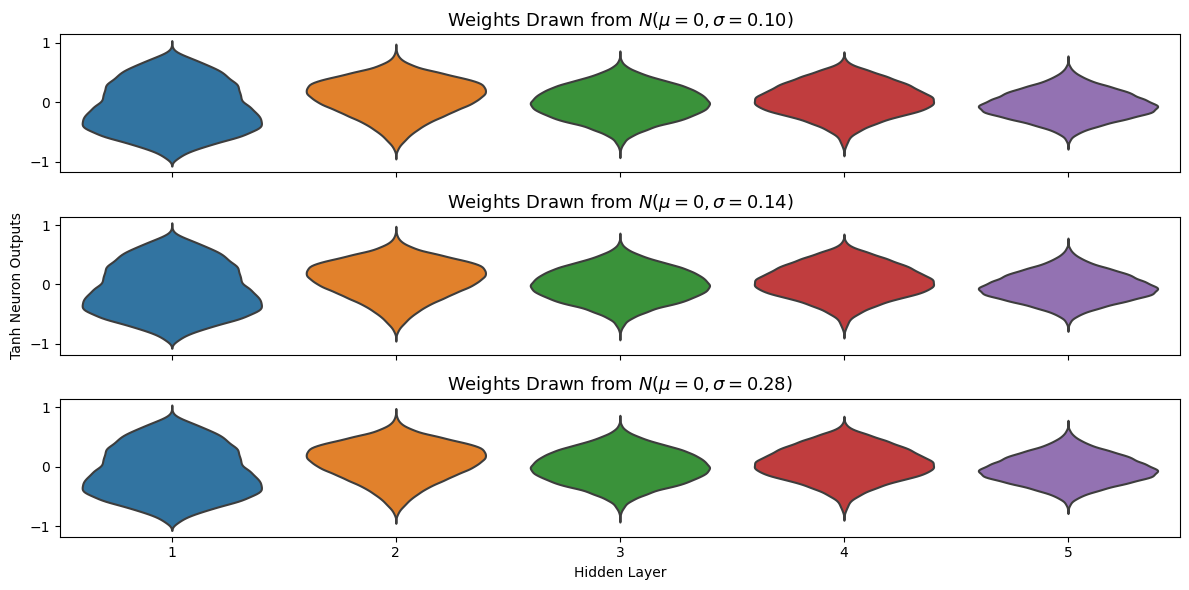

In [20]:
# Plot previously saved activations from the 5 hidden layers using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Tanh Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

**Tanh Activation:** The distribution for the tanh activation tends to be wider (especially for larger standard deviations of weight initialization), indicating that the gradients can vary quite a lot during training.

**Sigmoid Activation:** The gradients seem to be more concentrated around smaller values, especially for larger standard deviations.


- As the standard deviation of the weights increases, the variety in neuron activations also increases across the different layers. Values that are too low, as seen in the 0.10 graph, might risk more neurons getting "stuck", while higher values, like 0.28, promote varied activations but might risk more erratic behavior.
- As evidently seen in the σ = 0.10 graph, many neurons give zero outputs, which is indicative of the dying ReLU problem. This problem seems to diminish with higher σ values.
- As you move through the layers, neuron outputs tend to diversify, especially with higher σ values. By the 5th layer in the σ = 0.28 setup, the outputs are quite varied, suggesting that the network is capable of capturing a wide range of patterns.

## 3.2

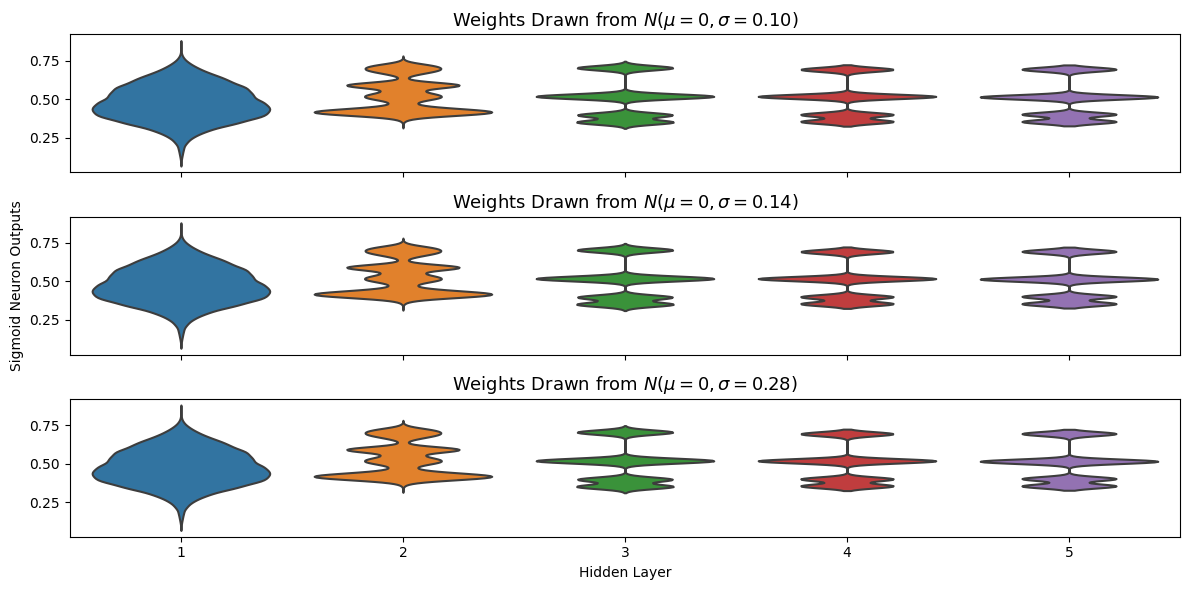

In [15]:
# your code starts here
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28


x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=seed)
    activation = 'sigmoid'
    input_shape = (data_dim,)
    bias_initializer = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    #ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Sigmoid Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()

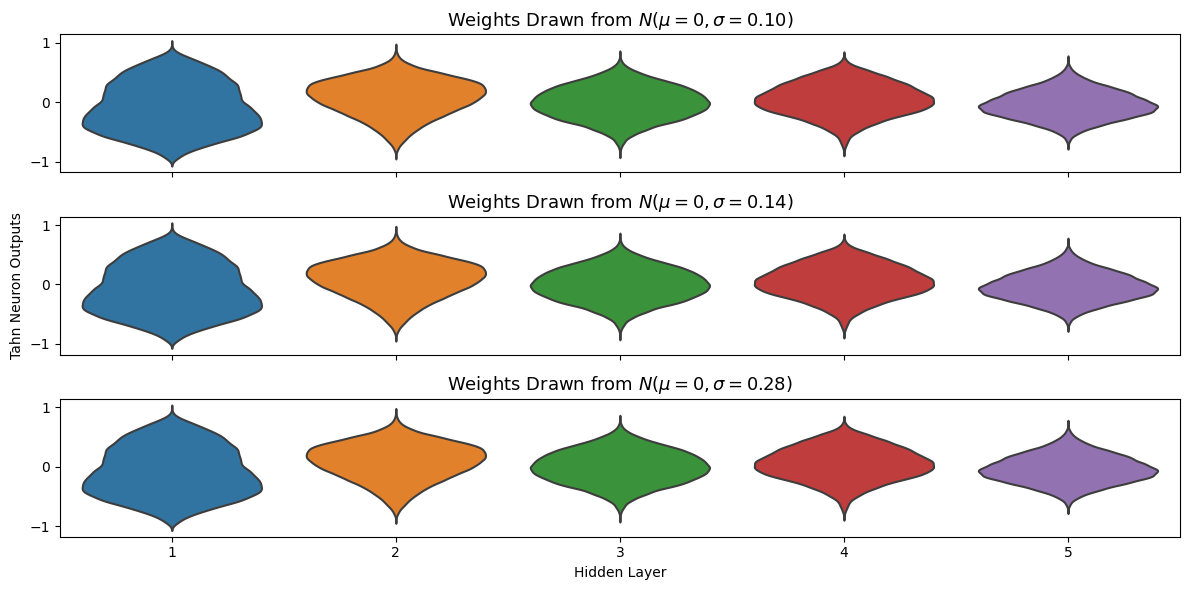

In [22]:
# your code starts here
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28


x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=seed)
    activation = 'tanh'
    input_shape = (data_dim,)
    bias_initializer = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    #ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Tahn Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()


**Answer:**

**1) Sigmoid Activation Function:**
- For the sigmoid function, in all scenarios where there are varying standard deviations of the weights, the gradients seem to be reasonably well spread and avoid vanishing or exploding, which is an improvement compared to our previous graphs without Xavier initialization.

**2) Tanh Activation Function:**
- Here, the gradients appear to have a broader spread as compared to sigmoid, suggesting that tanh might be benefiting even more from the Xavier initialization, potentially because tanh is zero-centered.


---

- The Xavier (Glorot normal) initialization appears to effectively address the vanishing and exploding gradient problems for the neural network configurations shown, irrespective of the activation function used.
- In both activation functions, the gradients are relatively consistent across layers. This suggests that Xavier initialization has been effective in preventing the vanishing/exploding gradient problem throughout the depth of the network.
- Both plots showcase appear symmetric around a central value, suggesting the Xavier initialization has ensured a balanced spread of the weights' gradients. This is in line with the aim of the Xavier initialization, which is to keep the scale of gradients roughly the same across all layers.
- Overall, both the sigmoid and tanh activation functions seem to benefit from this initialization, maintaining a consistent and balanced gradient distribution across layers. The standard deviation of the weights does affect the spread, however the Xavier initialization keeps the gradients consistent in comparison to the previous plots.

## 3.3

In [18]:
# your code starts here
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Hyperparameters
n_simulations = 1000
n_points = 3000
batch_size = 64
n_epochs = 10
n_hidden_layers = 10
dim_layer = 2

# f(x) = xsin(5x)
def f(x):
    return x * np.sin(5*x)

collapsed_count = 0

for i in range(n_simulations):
    print("Iteration #:", i)
    # Generate training data
    x_train = np.random.uniform(-np.sqrt(7), np.sqrt(7), n_points)
    y_train = f(x_train)

    # Model with ReLU activations
    model = Sequential()
    model.add(Dense(dim_layer, activation='relu', input_shape=(1,)))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation='relu'))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1)

    # Predict on test points to check network collapse
    test_points = np.linspace(-np.sqrt(7), np.sqrt(7), 100)
    predictions = model.predict(test_points)

    # Determine whether all predictions are equal
    if np.allclose(predictions, predictions[0], atol=1e-2):
        collapsed_count += 1

collapse_fraction = collapsed_count / n_simulations
print(f"Ratio of Collapsed Simulations: {collapse_fraction:.2f}")

Streaming output truncated to the last 5000 lines.
Epoch 9/10
47/47 [==============================] - 0s 5ms/step - loss: 1.0295
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
Iteration #: 773
Epoch 1/10
47/47 [==============================] - 2s 5ms/step - loss: 1.0514
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0440
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 1.0394
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0365
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0351
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0341
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0336
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0334
Epoch 9/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0332
Epoch 10/10
4/4 [==============================] - 0s 5ms/step
Iteration #: 774

**Answer:**

- The ratio value of 0.96 indicates that 96% of the 1000 independent training simulations resulted in a neural network collapse. In other words, 960 out of 1000 training simulations led to a dying ReLU neural network where the network collapsed to a constant function.
- In comparison to the paper by Lu et al. our collapse rate is over the reported 90% reported.
- This highlights the vulnerability of deep ReLU networks, especially regarding narrow widths, such as the 2 neurons per layer in our case, to the dying ReLU problem. In other words, a collapse in 96% of the simulations implies that the architecture and the function being approximated make the network highly susceptible to this issue.

## 3.4

In [19]:
# your code starts here
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import numpy as np

# Hyperparameters
n_simulations = 1000
n_points = 3000
batch_size = 64
n_epochs = 10
n_hidden_layers = 10
dim_layer = 2

# f(x) = xsin(5x)
def f(x):
    return x * np.sin(5*x)

collapsed_count = 0

for i in range(n_simulations):
    print("Iteration #:", i)
    # Generate training data
    x_train = np.random.uniform(-np.sqrt(7), np.sqrt(7), n_points)
    y_train = f(x_train)

    # Model with ReLU activations
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=(1,)))
    model.add(LeakyReLU(alpha=0.01))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer))
        model.add(LeakyReLU(alpha=0.01))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1)

    # Predict on test points to check network collapse
    test_points = np.linspace(-np.sqrt(7), np.sqrt(7), 100)
    predictions = model.predict(test_points)

    # Determine whether all predictions are equal
    if np.allclose(predictions, predictions[0], atol=1e-2):
        collapsed_count += 1

collapse_fraction = collapsed_count / n_simulations
print(f"Ratio of Collapsed Simulations: {collapse_fraction:.2f}")

Streaming output truncated to the last 5000 lines.
Epoch 9/10
47/47 [==============================] - 0s 4ms/step - loss: 1.0250
Epoch 10/10
4/4 [==============================] - 0s 5ms/step
Iteration #: 773
Epoch 1/10
47/47 [==============================] - 2s 4ms/step - loss: 1.0118
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.9978
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.9955
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.9957
Epoch 5/10
47/47 [==============================] - 0s 5ms/step - loss: 0.9956
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.9956
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.9957
Epoch 8/10
47/47 [==============================] - 0s 6ms/step - loss: 0.9957
Epoch 9/10
47/47 [==============================] - 0s 5ms/step - loss: 0.9954
Epoch 10/10
4/4 [==============================] - 0s 5ms/step
Iteration #: 774

**Answer:**

- The percentage of collapsed simulations reduced from 96% to 80%. This means that 800 out of the 1000 training simulations resulted in a neural network collapse, which, while still high, is noticeably lower than when using the standard ReLU activation. In other words, the Leaky ReLU activation did indeed help in preventing some of the dying neurons.

**The reason why there is such an improvement with the Leaky RelU is because:**
  - While the ReLU function outputs 0 for any negative input, the Leaky ReLU allows a small, non-zero gradient when the input is negative.
  - By allowing a small gradient for negative inputs, Leaky ReLU provides a pathway for backpropagation to update weights, regardless as to whether they are currently leading to negative activations.
  - This concept helps mitigate the vanishing gradient problem associated with regular ReLU and, hence, reduces the likelihood of neurons dying out. As a result, the implementation of Leaky ReLU makes the network more robust against the dying ReLU problem we faced earlier, which is evident from our decreased collapse ratio in our simulations.